# Model Training for Customer Churn prediction

## Feature Engineering

During data analysis, we found that our data has no missing values, duplicate rows or outliers. Hence, we don't have to handle these issues.

In [1]:
import pandas as pd
import numpy as np

In [2]:
original_df = pd.read_excel("../dataset/customer_churn_large_dataset.xlsx")
original_df.head()
df = original_df

df = df.drop(columns=["Name", "CustomerID"], errors="ignore")

df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [3]:
df.Gender = df.Gender.apply(lambda x: 1 if x=="Male" else 0)
df = df.rename(columns={"Gender": "is_male"})
df.head()

,Age,is_male,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0


In [4]:
df.Location = df.Location.apply(lambda x: x.replace(" ", "_").lower())

df = pd.get_dummies(df, "", "", columns=["Location"], dtype=int)
df.head()

,Age,is_male,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,chicago,houston,los_angeles,miami,new_york
0,63,1,17,73.36,236,0,0,0,1,0,0
1,62,0,1,48.76,172,0,0,0,0,0,1
2,24,0,5,85.47,460,0,0,0,1,0,0
3,36,0,3,97.94,297,1,0,0,0,1,0
4,46,0,19,58.14,266,0,0,0,0,1,0


In [5]:
df = df[["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB",
         "is_male", "chicago", "houston", "los_angeles", "miami", "new_york",
         "Churn"]]

df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,is_male,chicago,houston,los_angeles,miami,new_york,Churn
0,63,17,73.36,236,1,0,0,1,0,0,0
1,62,1,48.76,172,0,0,0,0,0,1,0
2,24,5,85.47,460,0,0,0,1,0,0,0
3,36,3,97.94,297,0,0,0,0,1,0,1
4,46,19,58.14,266,0,0,0,0,1,0,0


In [6]:
df_arr = df.to_numpy(np.float32)
df_arr

array([[63.  , 17.  , 73.36, ...,  0.  ,  0.  ,  0.  ],
       [62.  ,  1.  , 48.76, ...,  0.  ,  1.  ,  0.  ],
       [24.  ,  5.  , 85.47, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [64.  , 17.  , 96.11, ...,  0.  ,  0.  ,  1.  ],
       [51.  , 20.  , 49.25, ...,  0.  ,  1.  ,  1.  ],
       [27.  , 19.  , 76.57, ...,  0.  ,  0.  ,  1.  ]], dtype=float32)

In [7]:
X = df_arr[:, :-1]
Y = df_arr[:, -1]

print("Features:\n", X)
print("\nTarget:\n", Y)

Features:
 [[63.   17.   73.36 ...  1.    0.    0.  ]
 [62.    1.   48.76 ...  0.    0.    1.  ]
 [24.    5.   85.47 ...  1.    0.    0.  ]
 ...
 [64.   17.   96.11 ...  0.    0.    0.  ]
 [51.   20.   49.25 ...  0.    0.    1.  ]
 [27.   19.   76.57 ...  1.    0.    0.  ]]

Target:
 [0. 0. 0. ... 1. 1. 1.]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=8623)

print("Training data shape:", X_train.shape, Y_train.shape)
print("Testing data shape", X_test.shape, Y_test.shape)

Training data shape: (90000, 10) (90000,)
Testing data shape (10000, 10) (10000,)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
X_train[:,:4] = scaler.fit_transform(X_train[:,:4])
X_test[:,:4] = scaler.transform(X_test[:,:4])

print("X_train:\n", X_train[:5,:5])
print("\nX_test:\n", X_test[:5,:5])

X_train:
 [[-0.96153843 -0.3043478  -0.21142864 -0.12        0.        ]
 [-0.8076923  -0.91304344 -0.96971434 -0.29777777  0.        ]
 [ 0.26923084 -0.7391304   0.13485718  0.80444443  1.        ]
 [-0.7307692   1.         -0.41828573 -0.59999996  1.        ]
 [ 0.7307694  -0.6521739   0.7231426  -0.05777776  1.        ]]

X_test:
 [[-0.6923077   0.652174   -0.27200007 -0.38222218  1.        ]
 [ 0.15384626  0.7391305  -0.4545715  -0.5155555   0.        ]
 [ 0.76923084  0.39130437  0.26885724 -0.42666662  1.        ]
 [ 0.46153855 -0.47826082 -0.6420001  -0.12444437  0.        ]
 [-1.          0.30434787 -0.61371434 -0.09333324  0.        ]]


## Model Training

This is a basic model training program. It is written to quickly code and check the model training function.  
Actual model training will be done using training pipeline script in 'model_trainer' because full training takes a lot of time due to the size of the dataset.

In [10]:
# Models for selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "LR": {
        "model": LogisticRegression(random_state=456),
        "params": {
            "penalty": ['l2', None],
            "C": [0.01, 0.1, 0.5, 1]
        }
    },
         
    "Random Forest": {
        "model": RandomForestClassifier(random_state=350),
        "params":{
            "n_estimators": [10, 20],
            "max_depth": [10, 20]
        }
    },
    
    "GBoost": {
        "model": GradientBoostingClassifier(random_state=342),
        "params":{
            "n_estimators": [10, 50],
            "learning_rate": [0.01, 0.1]
        }
    },
    
    "MLP": {
        "model": MLPClassifier(max_iter=10, random_state=651),
        "params": {
            "hidden_layer_sizes": [
                [100],
                [100, 10]
            ],
            "alpha": [0.0001, 0.01],
            "learning_rate_init": [0.001, 0.1],
            "early_stopping": [True, False]
        }
    }
}

In [11]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV performs cross-validation on a model for each combination of hyperparameters
       
def search_and_train(X, Y, models: dict):
    "Returns best trained model and a dataframe of model performance report"
    
    best_score = None
    best_model = None
    report = {"Model": [], "best_params": [], "accuracy": [],
              "precision": [], "recall": [], "f1": [], "roc_auc": []}

    for name, m in models.items():
        gscv = GridSearchCV(m["model"], m["params"], 
                            scoring=("accuracy", "precision", "recall", "f1", "roc_auc"),
                            refit="recall",
                            verbose=1)
        gscv.fit(X, Y)
        
        mean_test_recall = gscv.cv_results_["mean_test_recall"][gscv.best_index_]
        assert mean_test_recall == gscv.best_score_, \
            f"Best Scores are different: {mean_test_recall} and {gscv.best_score_}"
        
        report["Model"].append(name)
        report["best_params"].append(gscv.best_params_)
        report["recall"].append(gscv.best_score_)
        report["accuracy"].append(gscv.cv_results_["mean_test_accuracy"][gscv.best_index_])
        report["precision"].append(gscv.cv_results_["mean_test_precision"][gscv.best_index_])
        report["f1"].append(gscv.cv_results_["mean_test_f1"][gscv.best_index_])
        report["roc_auc"].append(gscv.cv_results_["mean_test_roc_auc"][gscv.best_index_])
        
        if best_score is None or gscv.best_score_ > best_score:
            best_score = gscv.best_score_
            best_model = gscv.best_estimator_
    
    return best_model, pd.DataFrame(report)

In [12]:
import warnings
warnings.filterwarnings("ignore")

model, report = search_and_train(X_train, Y_train, models)

warnings.filterwarnings("default")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [13]:
report

,Model,best_params,accuracy,precision,recall,f1,roc_auc
0,LR,"{'C': 0.01, 'penalty': None}",0.500089,0.498855,0.422673,0.457145,0.500676
1,Random Forest,"{'max_depth': 20, 'n_estimators': 10}",0.501156,0.500051,0.493942,0.496973,0.500038
2,GBoost,"{'learning_rate': 0.1, 'n_estimators': 50}",0.501222,0.500180,0.391336,0.437481,0.499252
3,MLP,"{'alpha': 0.01, 'early_stopping': True, 'hidde...",0.499156,0.498093,0.612606,0.535529,0.500320


In [14]:
import joblib as jl
import os

os.makedirs("../artifacts", exist_ok=True)
jl.dump(model, "../artifacts/ml_model.jlb")

['../artifacts/model.jlb']

# Model Evaluation

In [44]:
import joblib as jl

model = jl.load("../artifacts/ml_model.jlb")
model

MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=[100, 10],
              max_iter=10, random_state=651)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.51      0.58      0.55      5121
         1.0       0.49      0.41      0.45      4879

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Confusion Matrix')

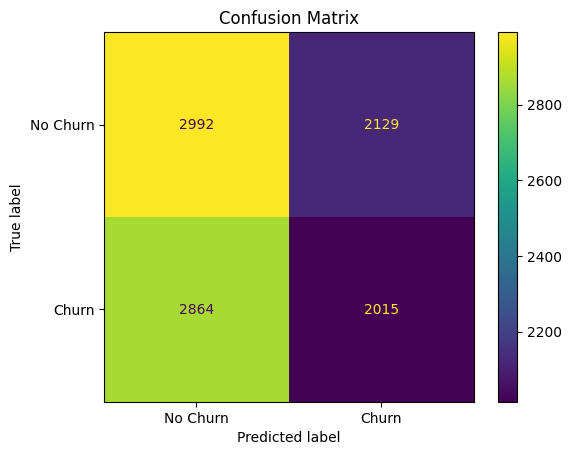

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = ConfusionMatrixDisplay(confusion_matrix(Y_test, model.predict(X_test), 
                                             labels=[0,1]), display_labels=["No Churn", "Churn"])
cm.plot()
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Precision-Recall Curve')

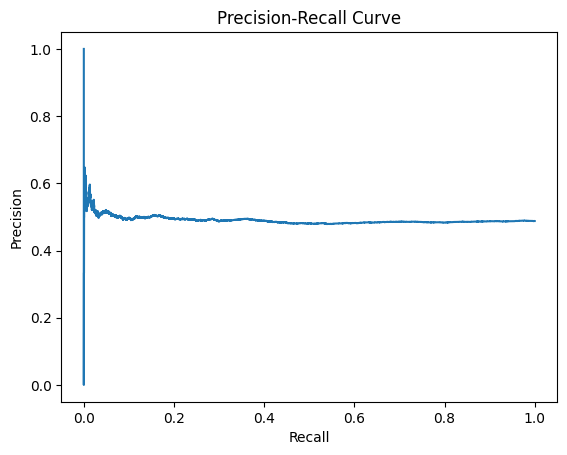

In [42]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:,1])

pcd = PrecisionRecallDisplay(precision, recall)
pcd.plot()
plt.title("Precision-Recall Curve")

Text(0.5, 1.0, 'ROC Curve')

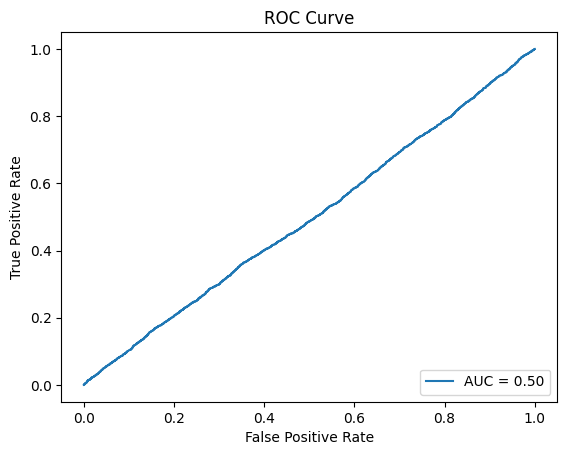

In [43]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
rcd = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
rcd.plot()
plt.title("ROC Curve")